# Tutorial 1

**Machine Learning I: Linear & Logistic Regression**


**[insert your name]**

**Important reminders**: Before starting, click "File -> Save a copy in Drive". Produce a pdf for submission by "File -> Print" and then choose "Save to PDF".

To complete this tutorial, you should have watched Video 9.1 - 9.3.



 Imports


In [1]:
# @markdown Imports

# Imports
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets  # interactive display
import math
import scipy.stats
from ipywidgets import *

 Plotting functions


In [2]:
# @markdown Plotting functions
import numpy
from numpy.linalg import inv, eig
from math import ceil
from matplotlib import pyplot, ticker, get_backend, rc
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle


%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

def plot_line_diff_residuals(x, y, slope):
  """ Plot observed vs predicted data

  Args:
      x (ndarray): observed x values
      y (ndarray): observed y values
      theta_hat (scalar): estimate for slope of line
  """

  x_range = np.arange(-10, 10, .1)
  fig, ax = plt.subplots()
  ax.scatter(x, y)  # our data scatter plot
  ax.plot(x_range, slope*x_range, color='k')

  # plot green lines
  y_hat = slope * x
  ymin = np.minimum(y, y_hat)
  ymax = np.maximum(y, y_hat)
  ax.vlines(x, ymin, ymax, 'g', alpha=0.5)

  # plot red lines
  data = np.concatenate(((x[:, None], y[:, None])), axis=1)
  theta = np.arctan(slope)

  w = np.asarray([np.cos(theta), np.sin(theta)])[None, :];

  z = data @ w.T @ w;
  dists = np.zeros((x.shape[0]))
  for i in range(x.shape[0]):
    ax.plot([data[i,0], z[i,0]], [data[i,1], z[i,1]], 'r')
    dists[i] = np.sqrt((z[i, 0] - data[i, 0])**2 + (z[i, 1] - data[i, 1])**2)

  ax.set(xlim=[-7, 7], ylim = [-7, 7])

  # Compute sum of squared lengths of residuals
  A = np.mean((y_hat-y)**2)

  B = np.mean(dists**2)
  ax.set_aspect('equal')
  ax.set(
      title=fr"$\hat{{\theta}}$ = {slope:0.2f}, A = {A:.3f}, B = {B:.3f}",
      xlabel='x',
      ylabel='y'
  )

# Exercise 1: PCA vs Linear Regression

This demo is inspired by (but quite changed) from NMA W1D3 T1.

We are going to explore the difference between the first PCA component and the linear regression line when both x and y are 1D. Play with the interactive demo and then answer the questions below. We are simulating data (the blue dots): both x and y are mean centered. You can then manipulate the slope of the plotted line and see how it affects the green lines vs the red lines.

**In the title, A is the summed squared length of the green lines. B is the summed squared length of the red lines.**


 Execute this cell to enable the demo


In [3]:
#@markdown Execute this cell to enable the demo

# Simulate some data
np.random.seed(121)

# Let's set some parameters
theta = 1.2
n_samples = 30

# Draw x and then calculate y
x = 10 * np.random.rand(n_samples)-5 # sample from a uniform distribution over [0,10)
noise = np.random.randn(n_samples)  # sample from a standard normal distribution
y = theta * x + noise

x = x - np.mean(x)
y = y - np.mean(y)

@widgets.interact(slope=widgets.FloatSlider(1.1, min=1.2, max=1.45, step=0.01 ))
def plot_data_estimate(slope):

  plot_line_diff_residuals(x, y, slope)
  plt.show()


interactive(children=(FloatSlider(value=1.2, description='slope', max=1.45, min=1.2, step=0.01), Output()), _d…

i) What slope gives the linear regression line (predicting y from x)?

ii) Why?

iii) What slope gives the first principal component of the data?

iv) Why?



### **Answer**
<font color='green'><span style="font-size:larger;">
i) <br>
ii) <br>
iii) <br>
iV) <br>
</font> </span>

# Exercise 2: Least squares solution for multiple linear regression

This problem was adapted from (and uses code from) NMA W1D3 T4.

Let's assume we are trying to decode the mouse running speed from the firing rates of two neurons. We are assuming a linear model so:

$$y = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

where y is the running speed and $x_1$ and $x_2$ are the firing rates of the two neurons respectively.

Remember that if we pose this problem in matrix form:

$$ \bar{y} = X\bar{\theta}$$

the vector $\theta$ that miminimizes the mean squared error between the predicted and true running speeds is:

$$ \hat{\theta} = (X^TX)^{-1}(X^T\bar{y}) $$

Here y is a vector of running speeds where the length is the number of data points. X is the design matrix involving the inputs and $\bar{\theta}$ is a vector of weights on the components of the design matrix.

Execute the cell below to generate the data we will fit our linear regression model to. The variables are called `y`, `x1`, and `x2`.

 Execute this cell to generate data


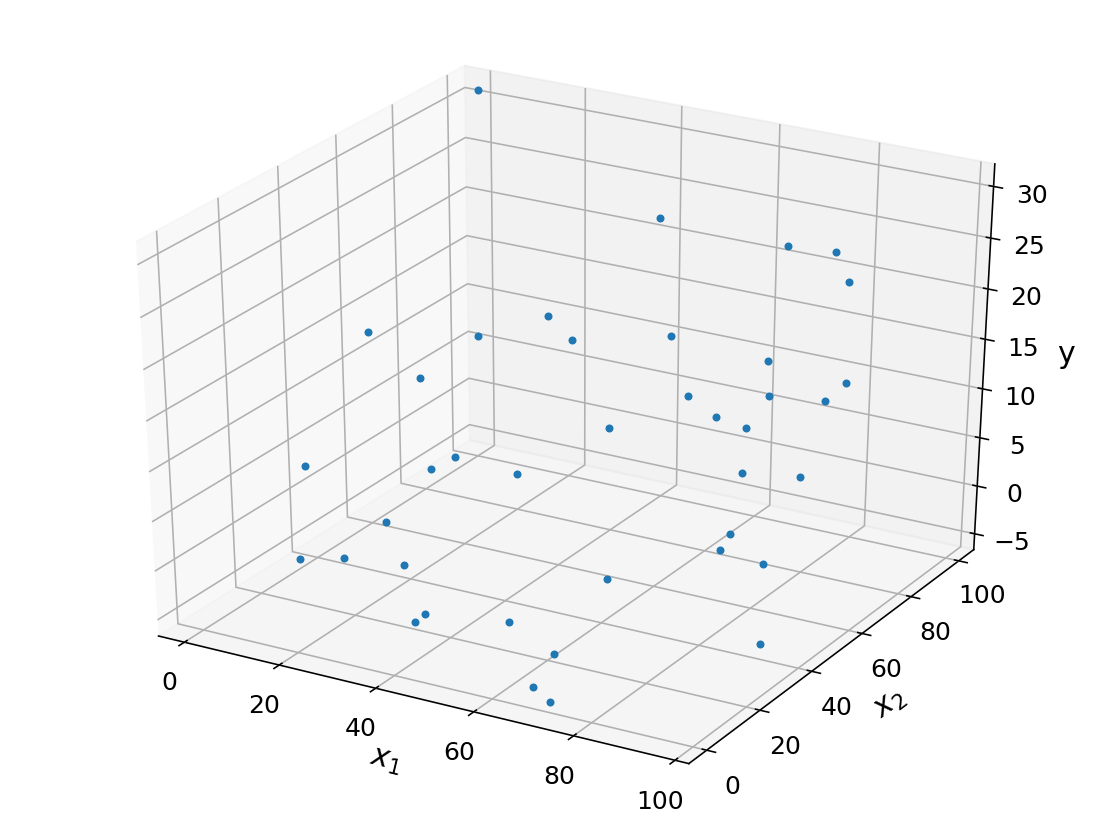

In [ ]:
# @markdown Execute this cell to generate data

# Set random seed for reproducibility
np.random.seed(1234)

# Set parameters
theta = [1, -.1, .3]
n_samples = 40

# Draw x and calculate y

x1 = np.random.uniform(0, 100, (n_samples, 1))
x2 = np.random.uniform(0, 100, (n_samples, 1))
noise = 5*np.random.randn(n_samples, 1)
y = theta[0] + theta[1]*x1 + theta[2]*x2 + noise


ax = plt.subplot(projection='3d')
ax.plot(x1[:, 0], x2[:, 0], y[:, 0], '.')

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

## A) Create design matrix

Create the design matrix $X$ so that the matrix form matches the first equation above.

### **Answer**
<font color='green'><span style="font-size:larger;">
Code below
</font> </span>

In [ ]:
# your code here
X = ...

## B) Implement least squares solution

Complete the function below to compute the least squares solution to estimate $\bar{\theta}$.

### **Answer**
<font color='green'><span style="font-size:larger;">
Code below
</font> </span>

In [ ]:
def ordinary_least_squares(X, y):
  """Ordinary least squares estimator for linear regression.

  Args:
    x (ndarray): design matrix of shape (n_samples, n_regressors)
    y (ndarray): vector of measurements of shape (n_samples)

  Returns:
    ndarray: estimated parameter values of shape (n_regressors)
  """

  # Compute theta_hat using OLS
  theta_hat = ...

  return theta_hat


theta_hat = ordinary_least_squares(X, y)
print(theta_hat)

## C) Compute MSE

Below, compute the mean square error between your predictions using the linear regression model and the true values of y.

Remember that your predictions are:
$$\hat{y} = X\hat{\theta} $$

### **Answer**
<font color='green'><span style="font-size:larger;">
Code below
</font> </span>

In [ ]:
y_hat = ...

MSE = ...
print(MSE)

## D) Thinking about what the model tells us

 Execute this cell to visualize predictions


In [ ]:
# @markdown Execute this cell to visualize predictions

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y, 'b', label = 'True')
ax.plot(y_hat, 'r', label = 'Predicted')
ax.legend()
ax.set(xlabel='Data points', ylabel='Running speed');

 Execute to see the fitted plane


In [ ]:
# @markdown Execute to see the fitted plane
theta_hat = ordinary_least_squares(X, y)
xx, yy = np.mgrid[0:100:50j, 0:100:50j]
y_hat_grid = np.array([xx.flatten(), yy.flatten()]).T @ theta_hat[1:]
y_hat_grid = y_hat_grid.reshape((50, 50))

ax = plt.subplot(projection='3d')
ax.plot(X[:, 1], X[:, 2], y[:, 0], '.')
ax.plot_surface(xx, yy, y_hat_grid, linewidth=0, alpha=0.5, color='C1',
                cmap=plt.get_cmap('coolwarm'))

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

Based on these plots and $\hat{\theta}$:

i) Do you think neurons 1 and 2 contain information about running speed in their responses?

ii) If we were going to interpret the weights (which we should be very careful about!!!), what effect would you say neuron 1 firing a lot has on the running speed?

iii) What effect does neuron 2 firing a lot have on the running speed?  

Note we cannot say anything causal here  - we cannot say if the firing of the neurons is changing the running speed, if the running speed is affecting the neurons, or if there is some third variable that affects both.

### **Answer**
<font color='green'><span style="font-size:larger;">
i) <br>
ii) <br>
iii) <br>
</font> </span>

# Exercise 3 (Optional): MLE for linear regression

Prove that the MLE for the linear model assuming Gaussian noise is the same as the least squares solution. Do this either for 1D inputs or multidimensional inputs (more advanced)

### **Answer**
<font color='green'><span style="font-size:larger;">
Answer here
</font> </span>